In [309]:
#%run Data_Wrangling_Capstone_Two-Copy4.ipynb

In [310]:
#%run Exploratory_Data_Analysis_Capstone2.ipynb

In [311]:
#%run Capstone_Two_Pre-processing_and_Training_Data_Development.ipynb

In [307]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [243]:
super_data_frame.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
a 0  AFG         Afghanistan     SA         SA     Least Developed   40.0   
  1  ALB             Albania    ECA       EECA      More Developed    2.0   
  2  DZA             Algeria   MENA       MENA      Less Developed    6.0   
  3  AND             Andorra    ECA         WE      More Developed    NaN   
  4  AGO              Angola    SSA        ESA     Least Developed   15.0   

     Female  Male  Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
a 0    56.0  25.0             46.0             23.0                     50.0   
  1     2.0   2.0              2.0              2.0                      4.0   
  2     6.0   5.0              8.0              4.0                     12.0   
  3     NaN   NaN              NaN              NaN                      NaN   
  4    17.0  14.0             28.0             10.0                     31.0   

     Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
a 0                    48.0                    49.0                    33.0   
  1                     2.0                     2.0                     1.0   
  2                     6.0                     5.0                     3.0   
  3                     NaN                     NaN                     NaN   
  4                    26.0                    16.0                     6.0   

     Richest_Wealth quintile   Data source  Time period  
a 0                     21.0      DHS 2015       2015.0  
  1                      1.0   DHS 2017-18       2018.0  
  2                      2.0  MICS 2012-13       2013.0  
  3                      NaN           NaN          NaN  
  4                      4.0   DHS 2015-16       2016.0

In [308]:
sdf1 = super_data_frame.drop(columns=['ISO3', 'Sub-region', 'Data source', 'Time period']).dropna(how='any')
print(sdf1.head())

    Countries and areas Region Development Regions  Total  Female  Male  \
a 0         Afghanistan     SA     Least Developed   40.0    56.0  25.0   
  1             Albania    ECA      More Developed    2.0     2.0   2.0   
  2             Algeria   MENA      Less Developed    6.0     6.0   5.0   
  4              Angola    SSA     Least Developed   15.0    17.0  14.0   
  8             Armenia    ECA      Less Developed    1.0     1.0   1.0   

     Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
a 0             46.0             23.0                     50.0   
  1              2.0              2.0                      4.0   
  2              8.0              4.0                     12.0   
  4             28.0             10.0                     31.0   
  8              0.0              1.0                      1.0   

     Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
a 0                    48.0                    49.0                    33

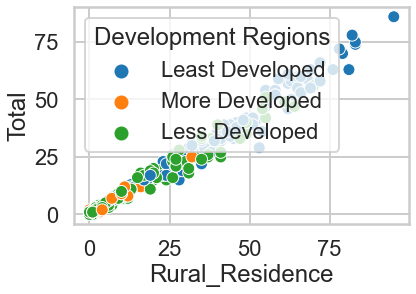

In [245]:
#Scatterplot of Rural Residence vs. Total with the points colored by Development Regions
sns.scatterplot(data=sdf1, x='Rural_Residence', y='Total', hue='Development Regions');

In [246]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(sdf1[['Rural_Residence', 'Total']].values, (sdf1['Development Regions'] ==
                                                                                         'Least Developed').values,
                                             random_state=5)
clf1 = LogisticRegression()
clf1.fit(Xlr, ylr)

print(accuracy_score(clf1.predict(Xtestlr), ytestlr))

0.6710526315789473


In [247]:
#Using the cv_score function to perform K-fold cross validation and apply a scoring function to each test fold
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x):
        clf.fit(x[train], y[train])
        result += score_func(clf.predict(x[test]), y[test])
        return result / nfold

In [248]:
#Use of cv_score for basic logistic regression without regularization
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.14347826086956522


In [249]:
#Using a grid of parameters to search over to find a good model
c_1 = LogisticRegression(C=0.001)
score_1 = cv_score(c_1, Xlr, ylr)
print(score_1)

c_2 = LogisticRegression(C=0.1)
score_2 = cv_score(c_2, Xlr, ylr)
print(score_2)

c_3 = LogisticRegression(C=1)
score_3 = cv_score(c_3, Xlr, ylr)
print(score_3)

c_4 = LogisticRegression(C=10)
score_4 = cv_score(c_4, Xlr, ylr)
print(score_4)

c_5 = LogisticRegression(C=100)
score_5 = cv_score(c_5, Xlr, ylr)
print(score_5)

0.14782608695652172
0.14347826086956522
0.14347826086956522
0.14347826086956522
0.14347826086956522


In [250]:
#Estimating how this model will predict on unseen data and calculating the accuracy on the test data.
c_1.fit(Xlr, ylr)
print(accuracy_score(c_1.predict(Xtestlr), ytestlr))

0.6842105263157895


In [252]:
sdf2 = super_data_frame.drop(columns=['ISO3', 'Countries and areas', 'Region', 'Sub-region', 'Poorest_Wealth quintile',
                                     'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile',
                                     'Richest_Wealth quintile', 'Data source', 'Time period']).dropna(how='any')

In [253]:
sdf2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 322 entries, ('a', 0) to ('c', 201)
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Development Regions  322 non-null    object 
 1   Total                322 non-null    float64
 2   Female               322 non-null    float64
 3   Male                 322 non-null    float64
 4   Rural_Residence      322 non-null    float64
 5   Urban_Residence      322 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.3+ KB


In [254]:
X = sdf2.drop('Development Regions', axis=1)
y = sdf2['Development Regions']

In [ ]:
#I decided to go with the Kernel SVM model as the data I'm working with to address the problem identification is best 
#suited for an algorithm built for non-linearly separable data that is multiclass.

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [257]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [258]:
y_pred = svclassifier.predict(X_test)

In [265]:
#Evaluations for the polynomial kernel
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

[[10 13  0]
 [ 3 35  0]
 [ 0  4  0]]
                 precision    recall  f1-score   support

Least Developed       0.77      0.43      0.56        23
 Less Developed       0.67      0.92      0.78        38
 More Developed       1.00      0.00      0.00         4

       accuracy                           0.69        65
      macro avg       0.81      0.45      0.44        65
   weighted avg       0.73      0.69      0.65        65



In [271]:
#Gaussian kernel
svclassifier2 = SVC(kernel='rbf')
svclassifier2.fit(X_train, y_train)

SVC()

In [278]:
y_pred2 = svclassifier2.predict(X_test)

In [279]:
#Evaluations for the Gaussian kernel - The Gaussian kernel was overall the best in performance for the dataset as it 
#achieves the highest scores and best classifications throughout.
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2, zero_division=1))

[[14  9  0]
 [ 6 32  0]
 [ 1  3  0]]
                 precision    recall  f1-score   support

Least Developed       0.67      0.61      0.64        23
 Less Developed       0.73      0.84      0.78        38
 More Developed       1.00      0.00      0.00         4

       accuracy                           0.71        65
      macro avg       0.80      0.48      0.47        65
   weighted avg       0.72      0.71      0.68        65



In [280]:
#Sigmoid used for binary classification
svclassifier3 = SVC(kernel='sigmoid')
svclassifier3.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [281]:
y_pred3 = svclassifier3.predict(X_test)

In [282]:
#Evaluations for the Sigmoid kernel
#Sigmoid kernel performed the worst as it returns two values and is therefore applicable to binary classification problems.
#We are working with 3 output classes here.
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[12  9  2]
 [15 23  0]
 [ 1  3  0]]
                 precision    recall  f1-score   support

Least Developed       0.43      0.52      0.47        23
 Less Developed       0.66      0.61      0.63        38
 More Developed       0.00      0.00      0.00         4

       accuracy                           0.54        65
      macro avg       0.36      0.38      0.37        65
   weighted avg       0.54      0.54      0.53        65

